In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
df = pd.read_csv("customer churn.csv")
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.isnull().sum().sum()

0

In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


#replace blanks with 0

In [6]:
df["TotalCharges"] = df["TotalCharges"].replace(" ", "0")
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
df["customerID"].duplicated().sum()

0

#convert 0 and 1 value of SeniorCitizen to yes/no to make it understand

In [9]:
def conv(value):
    if value == 1:
        return "yes"
    else:
        return "no"
df["SeniorCitizen"] = df["SeniorCitizen"].apply(conv)

In [10]:
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


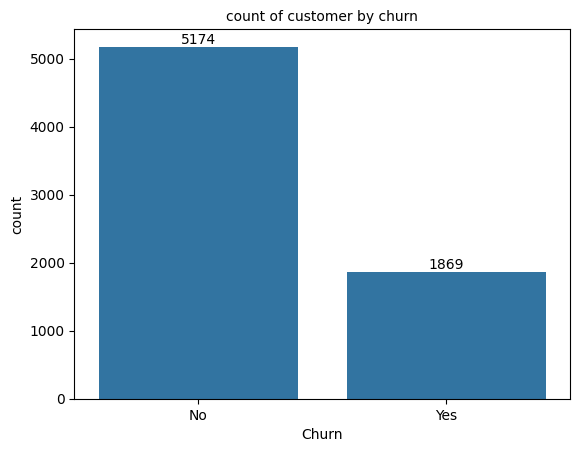

In [11]:
ax = sns.countplot(x = 'Churn' , data = df)
ax.bar_label(ax.containers[0])
plt.title("count of customer by churn", fontsize = 10)
plt.show()

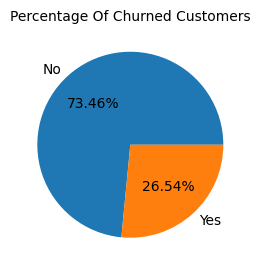

In [12]:
plt.figure(figsize= (3,4))
gb = df.groupby('Churn').agg({'Churn':"count"})
gb
plt.pie(gb['Churn'], labels = gb.index, autopct = "%1.2f%%")
plt.title("Percentage Of Churned Customers", fontsize =10)
plt.show()

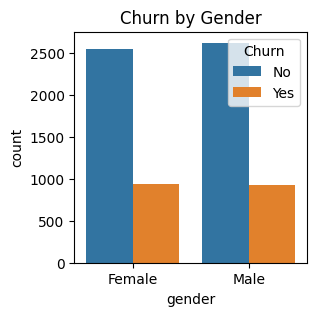

In [13]:
plt.figure(figsize=(3,3))
sns.countplot(x = 'gender', data = df, hue = "Churn")
plt.title("Churn by Gender")
plt.show()

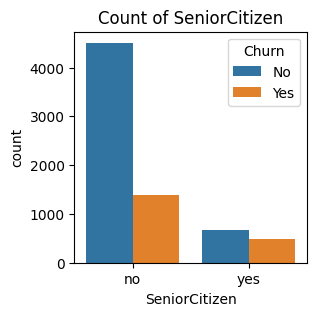

In [14]:
plt.figure(figsize=(3,3))
sns.countplot(x = 'SeniorCitizen', data = df, hue = "Churn")
plt.title("Count of SeniorCitizen")
plt.show()

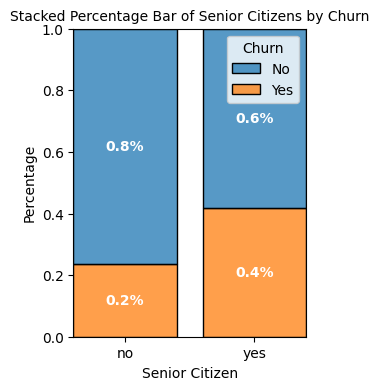

In [15]:
# Compute percentage values
df_percentage = df.groupby("SeniorCitizen")["Churn"].value_counts(normalize=True).unstack()

# Plot
plt.figure(figsize=(3, 4))
ax = sns.histplot(data=df, x="SeniorCitizen", hue="Churn", stat="percent", multiple="fill", shrink=0.8)

# Annotate percentages
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Avoid labeling empty bars
        ax.annotate(f"{height:.1f}%", 
                    (p.get_x() + p.get_width() / 2, p.get_y() + height / 2),
                    ha="center", va="center", fontsize=10, color="white", weight="bold")

plt.title("Stacked Percentage Bar of Senior Citizens by Churn", fontsize= 10)
plt.xlabel("Senior Citizen")
plt.ylabel("Percentage")
plt.show()

#1 or 2 months have churn

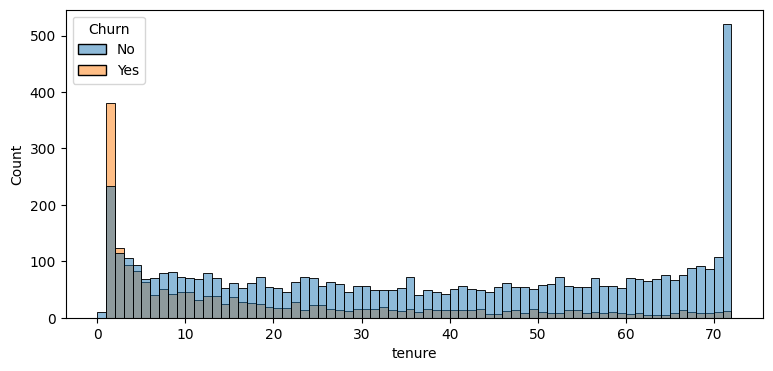

In [16]:
plt.figure(figsize=(9, 4))
sns.histplot(x = 'tenure', data = df, bins = 72, hue= 'Churn')
plt.show()

#find count of churn through the contract

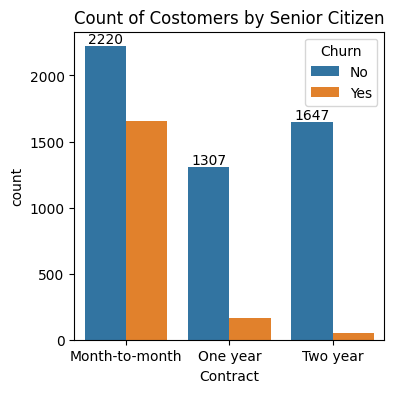

In [17]:
plt.figure(figsize=(4,4))
ax= sns.countplot(x = "Contract" , data = df,hue = 'Churn')
ax.bar_label(ax.containers[0])
plt.title("Count of Costomers by Senior Citizen")
plt.show()

In [18]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

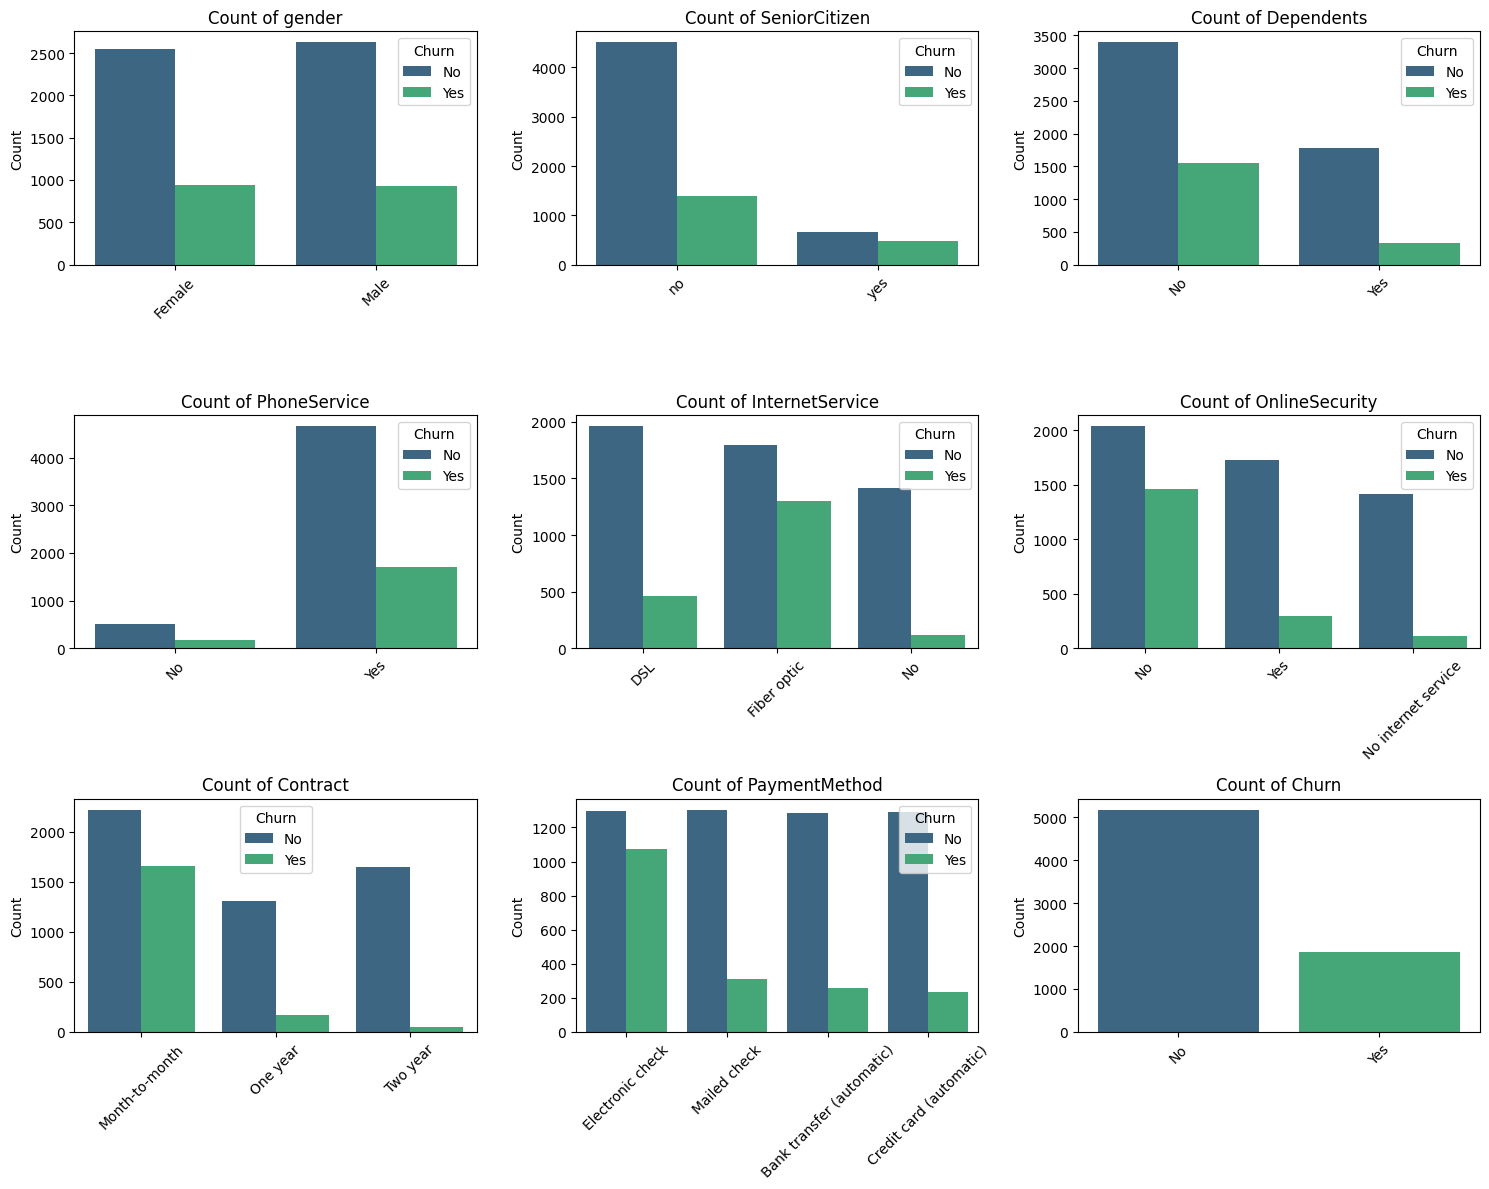

In [19]:
# Define categorical columns
categorical_cols = [
    'gender', 'SeniorCitizen', 'Dependents',
    'PhoneService', 'InternetService',
    'OnlineSecurity', 'Contract', 'PaymentMethod', 'Churn'
]

# Determine subplot grid size
n_cols = 3  # Number of columns in subplot grid
n_rows = math.ceil(len(categorical_cols) / n_cols)  # Dynamic rows

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Plot countplots
for i, col in enumerate(categorical_cols):
    sns.countplot(x=col, data=df, ax=axes[i], palette="viridis", hue ="Churn")
    axes[i].set_title(f"Count of {col}")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis="x", rotation=45)  # Rotate x labels for readability

# Remove empty subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

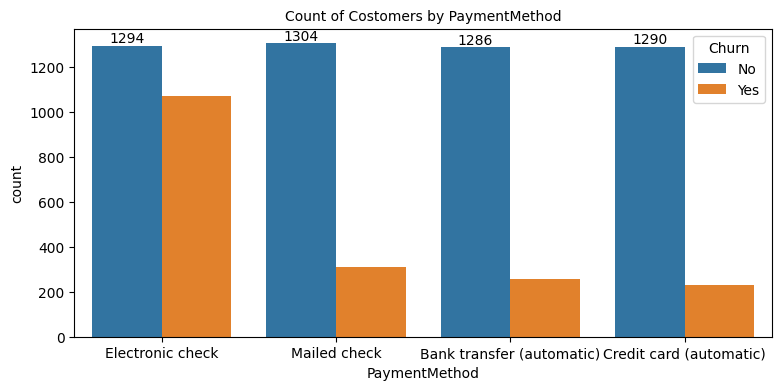

In [20]:
plt.figure(figsize=(9,4))
ax= sns.countplot(x = "PaymentMethod" , data = df,hue = 'Churn')
ax.bar_label(ax.containers[0])
plt.title("Count of Costomers by PaymentMethod", fontsize =10)
plt.show()